In [1]:
import numpy as np
import pandas as pd
import random
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("CRX/crx.data", delimiter='\t', header=None) 
df.columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'label']
df.head()


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,label
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
X = pd.get_dummies(df.drop('label', axis=1))

In [4]:
X.head()

,f2,f7,f10,f14,f0_?,f0_a,f0_b,f1_13.75,f1_15.17,f1_15.75,...,f13_00680,f13_00711,f13_00720,f13_00760,f13_00840,f13_00928,f13_00980,f13_01160,f13_02000,f13_?
0,0.000,1.25,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.460,3.04,6,560,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.500,1.50,0,824,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.540,3.75,5,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.625,1.71,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df['label'].replace('-', -1,inplace=True)
df['label'].replace('+', 1,inplace=True)
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,label
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [6]:
y = df.iloc[:, -1]
df = X.join(y)

In [7]:
from random import randrange
def make_k_folds(df, kfolds):
    data_folds = list()
    for i in range(kfolds):
        data_folds.append(pd.DataFrame())
    counter = 0
    for i in range(len(df)):
        if counter >= kfolds:
            counter = 0
        data_folds[counter] = data_folds[counter].append(df[i:i+1])
        counter += 1
    return data_folds

In [8]:
k = 5
dataset = make_k_folds(df, k)

In [9]:
testing_set = dataset[0]
training_set = pd.DataFrame()
for i in range (1, 5):
    print(i)
    training_set = training_set.append(dataset[i])

1
2
3
4


In [10]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    index_list = df.index.tolist()
    test_indexes = random.sample(population=index_list, k=test_size)

    test_df = df.loc[test_indexes]
    train_df = df.drop(test_indexes)
    
    return train_df, test_df

In [11]:
random.seed(3)
train_df1, test_df1 = train_test_split(df, 0.95)
train_df2, test_df2 = train_test_split(df, 0.90)
train_df3, test_df3 = train_test_split(df, 0.85)
train_df4, test_df4 = train_test_split(df, 0.70)
train_df5, test_df5 = train_test_split(df, 0.50)
train_df6, test_df6 = train_test_split(df, 0.30)

In [12]:
X_train1 = train_df1.iloc[: , :-1]
y_train1 = train_df1.iloc[: , -1]

X_train2 = train_df2.iloc[: , :-1]
y_train2 = train_df2.iloc[: , -1]

X_train3 = train_df3.iloc[: , :-1]
y_train3 = train_df3.iloc[: , -1]

X_train4 = train_df4.iloc[: , :-1]
y_train4 = train_df4.iloc[: , -1]

X_train5 = train_df5.iloc[: , :-1]
y_train5 = train_df5.iloc[: , -1]

X_train6 = train_df6.iloc[: , :-1]
y_train6 = train_df6.iloc[: , -1]



X_test = testing_set.iloc[: , :-1]
y_test = testing_set.iloc[: , -1]

In [13]:
# Determines if sample shall be classified as -1 or 1 given threshold
def make_clf_dict():
    clf_dict = {'polarity': 1, 'feature_index': None, 'threshold': None, 'alpha': None}
    return clf_dict

In [14]:
def predict(X):
    n_samples = np.shape(X)[0]
    y_pred = np.zeros((n_samples, 1))
    # For each classifier => label the samples
    for clf in clfs:
        # Set all predictions to '1' initially
        predictions = np.ones(np.shape(y_pred))
        # The indexes where the sample values are below threshold
        negative_idx = (clf['polarity'] * X[clf['feature_index']] < clf['polarity'] * clf['threshold'])
        # Label those as '-1'
        predictions[negative_idx] = -1
        # Add predictions weighted by the classifiers alpha
        # (alpha indicative of classifier's proficiency)
        y_pred += clf['alpha'] * predictions

    # Return sign of prediction sum
    y_pred = np.sign(y_pred).flatten()

    return y_pred




In [15]:
n_clf = 100

def fit(X, y):
    n_samples, n_features = np.shape(X)

    # Initialize weights to 1/N
    w = np.full(n_samples, (1 / n_samples))

    clfs = []
    # Iterate through classifiers
    for _ in range(n_clf):
        
        clf = make_clf_dict()
        # Minimum error given for using a certain feature value threshold
        # for predicting sample label
        min_error = float('inf')
        # Iterate throught every unique feature value and see what value
        # makes the best threshold for predicting y
        for feature_i in X_train.columns:
            feature_values = np.expand_dims(X[feature_i], axis=1)
            unique_values = np.unique(feature_values)
            # Try every unique feature value as threshold
            for threshold in unique_values:
                p = 1
                # Set all predictions to '1' initially
                prediction = np.ones(np.shape(y))
                # Label the samples whose values are below threshold as '-1'
                prediction[X[feature_i] < threshold] = -1
                # Error = sum of weights of misclassified samples
                error = sum(w[y != prediction])

                # If the error is over 50% we flip the polarity so that samples that
                # were classified as 0 are classified as 1, and vice versa
                # E.g error = 0.8 => (1 - error) = 0.2
                if error > 0.5:
                    error = 1 - error
                    p = -1

                # If this threshold resulted in the smallest error we save the
                # configuration
                if error < min_error:
                    clf['polarity'] = p
                    clf['threshold'] = threshold
                    clf['feature_index'] = feature_i
                    min_error = error
        # Calculate the alpha which is used to update the sample weights,
        # Alpha is also an approximation of this classifier's proficiency
        clf['alpha'] = 0.5 * math.log((1.0 - min_error) / (min_error + 1e-10))
        # Set all predictions to '1' initially
        predictions = np.ones(np.shape(y))
        # The indexes where the sample values are below threshold
        negative_idx = (clf['polarity'] * X[clf['feature_index']] < clf['polarity'] * clf['threshold'])
        # Label those as '-1'
        predictions[negative_idx] = -1
        # Calculate new weights 
        # Missclassified samples gets larger weights and correctly classified samples smaller
        w *= np.exp(-clf['alpha'] * y * predictions)
        # Normalize to one
        w /= np.sum(w)

        # Save classifier
        clfs.append(clf)
    return clfs



In [16]:

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Adaboost classification with 5 weak classifiers
X_train = X_train1
y_train = y_train1
clfs = fit(X_train, y_train)
y_pred1 = predict(X_test)
# y_train_pred = predict(X_train)

X_train = X_train2
y_train = y_train2
clfs = fit(X_train, y_train)
y_pred2 = predict(X_test)

X_train = X_train3
y_train = y_train3
clfs = fit(X_train, y_train)
y_pred3 = predict(X_test)

X_train = X_train4
y_train = y_train4
clfs = fit(X_train, y_train)
y_pred4 = predict(X_test)

X_train = X_train5
y_train = y_train5
clfs = fit(X_train, y_train)
y_pred5 = predict(X_test)

X_train = X_train6
y_train = y_train6
clfs = fit(X_train, y_train)
y_pred6 = predict(X_test)

In [17]:
acc1 = np.mean(np.array(y_test) == y_pred1)
acc2 = np.mean(np.array(y_test) == y_pred2)
acc3 = np.mean(np.array(y_test) == y_pred3)
acc4 = np.mean(np.array(y_test) == y_pred4)
acc5 = np.mean(np.array(y_test) == y_pred5)
acc6 = np.mean(np.array(y_test) == y_pred6)

In [18]:
# y_test

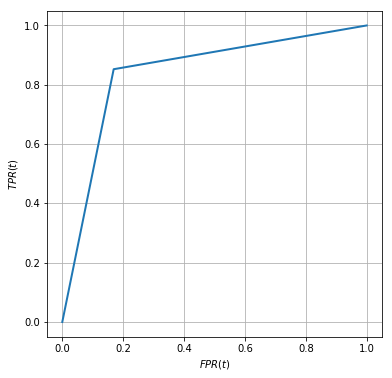

In [19]:
thresholds = np.linspace(2,-2,105)

ROC = np.zeros((105,2))

for i in range(105):
    t = thresholds[i]
    
    TP_t = np.logical_and( y_pred5 > t, y_test==1 ).sum()
    TN_t = np.logical_and( y_pred5 <=t, y_test==-1 ).sum()
    FP_t = np.logical_and( y_pred5 > t, y_test==-1 ).sum()
    FN_t = np.logical_and( y_pred5 <=t, y_test==1 ).sum()

    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t

    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t

fig = plt.figure(figsize=(6,6))
plt.plot(ROC[:,0], ROC[:,1], lw=2)
plt.xlabel('$FPR(t)$')
plt.ylabel('$TPR(t)$')
plt.grid()

In [20]:
AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5
AUC

0.841813923781137

In [21]:
acc1

0.7318840579710145

In [22]:
acc2

0.8115942028985508

In [23]:
acc3

0.8840579710144928

In [24]:
acc4

0.8333333333333334

In [25]:
acc5

0.8405797101449275

In [26]:
acc6

0.8333333333333334